In [1]:
# Python set up (load modules) 
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 

# Tutorial auto data 

This tutorial involves the use of simple linear regression on the **Auto data set** (see data description). 

We use the lm() function to perform linear regressions with **mpg** as the response and **horsepower** as the predictor. Furthermore, we use the summary() function to print the results and comment on the output. For example:

   1. Is there a relationship between the predictor and the response?
   2. How strong is the relationship between the predictor and the response?
   3. Is the relationship between the predictor and the response positive or negative?
   4. What is the predicted mpg associated with a horsepower of 98? What are the associted 95% confidence and prediction intervals?

Finally, we plot the response and the predictor and produce some **diagnostic plots** (1. Residuals vs fitted plot, 2. Normal Q-Q plot, 3. Scale-location plot, 4. Residuals vs leverage plot) to describe the linear regression fit. We comment on any problems we see with the fit. 

## Import data

In [37]:
# Load the csv data files into pandas dataframes
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Auto.csv")

First of all, let's take a look at the variables (columns) in the data set.

In [39]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    category
dtypes: category(2), float64(4), int64(3)
memory usage: 38.1 KB


## Tidying data

In [41]:
# change data type
df['origin'] = pd.Categorical(df['origin'])
df['name'] = pd.Categorical(df['name'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

Note that we have an issue with the horsepower variable. It seems that there is an string present, were only integers should be allowed. We transfrom the data with `pd.to_numeric` and use `errors='coerce'` to replace the string with a NAN [(see Pandas documenation)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html)

### Handle missing values

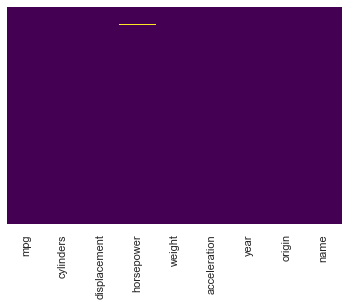

In [12]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

We can also check the column-wise distribution of null values:

In [13]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [42]:
# We simply drop the missing lines
df = df.dropna()

In [43]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


## Transform data

In [44]:
# summary statistics for all numerical columns
round(df.describe(),2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [45]:
# summary statistics for all categorical columns
df.describe(include=['category'])

,origin,name
count,392,392
unique,3,301
top,1,ford pinto
freq,245,5


## Visualize data

### Distibution of Variables

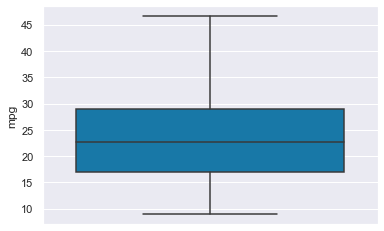

In [46]:
# boxplot of dependent variable
sns.boxplot(y='mpg', data=df, palette='winter');

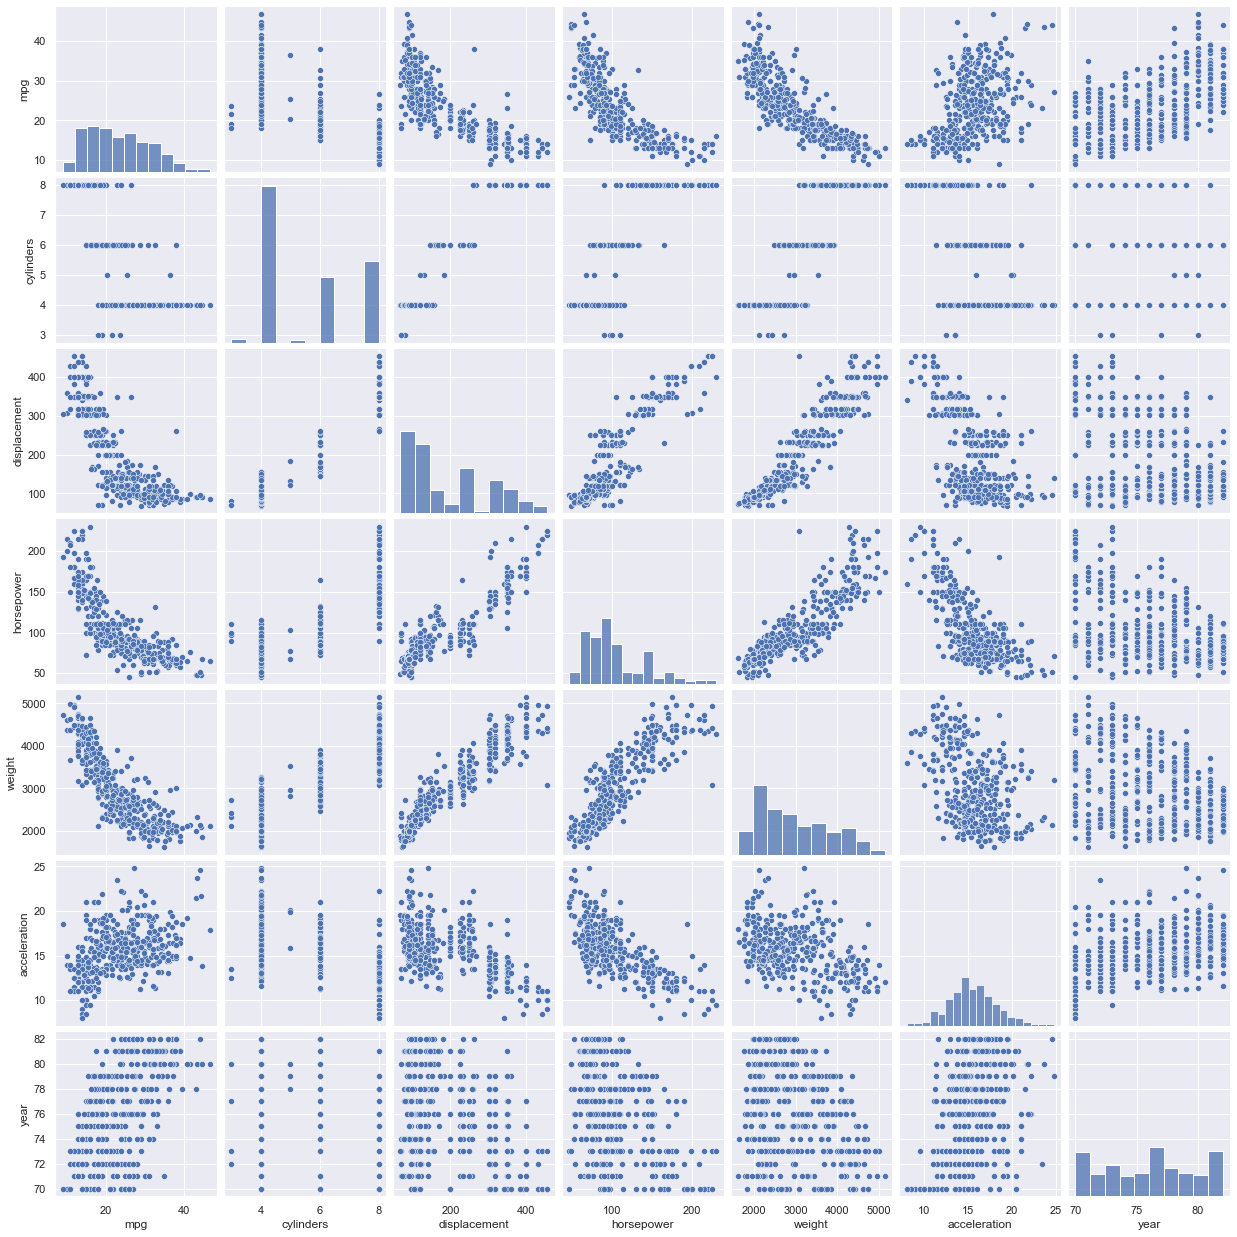

In [19]:
sns.pairplot(df);

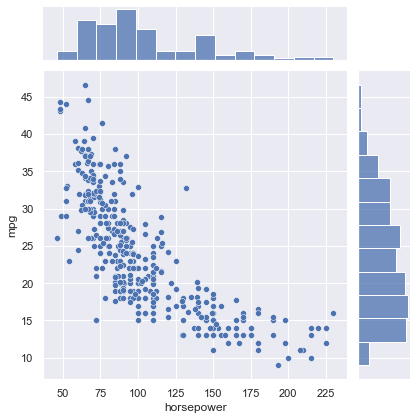

In [22]:
# check relationship with a joint plot
sns.jointplot(x="horsepower", y="mpg", data=df);

## Regression Models

### Models

(a) Use the lm() function to perform a simple linear regression with **mpg** as the response and **horsepower** as the predictor. Use the summary() function to print the results. 

In [25]:
ols = smf.ols(formula ='mpg ~  horsepower', data=df).fit()

In [26]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        21:30:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We use [Seaborne's lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to plot the regression line:

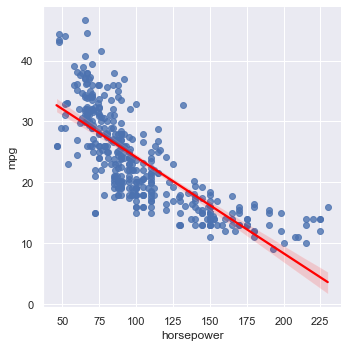

In [27]:
# Plot regression line with 95% confidence intervall
sns.lmplot(x='horsepower', y='mpg', data=df, line_kws={'color':'red'}, height=5, ci=95, );

### Interpretation

**1. Is there a relationship between the predictor and the response?**

Yes, according to our linear model there is a statistically significant relationship between horsepower and mpg. The model coefficients are all significant on the 0.001 level and the F-statistic is far larger than 1 with a p-value close to zero. Therefore we can reject the null hypothesis and state that there is a statistically significant relationship between horsepower and mpg.

**2. How strong is the relationship between the predictor and the response?**

In [30]:
# Test relationship and strength with correlation
stats.pearsonr(df['mpg'], df['horsepower'])

(-0.7784267838977761, 7.031989029404151e-81)

The $R^2$ of our model indicates a moderate to strong relationship (around 61% of variation in the data can be explained with our model) between the predictor and the response. Furthermore, we used Pearson's product-moment correlation to test the relationship between the predictor and the response (see code above). The results of the correlation indicate a strong, statistically significant negative relationship.

**3. Is the relationship between the predictor and the response positive or negative?**

The relationship between mpg and horsepower is negative (see regression coefficient of horsepower (-0.1578). That means the more horsepower an automobile has the less mpg fuel efficiency the automobile will have according to our model. 

In particular, all other things being equal, an increase of 1 horsepower leads to an 0.1578 decrease in mpg on average. 

**4. What is the predicted mpg associated with a horsepower of 98? What are the associted 95% confidence and prediction intervals?**

In [31]:
to_predict = pd.DataFrame({'horsepower':[98]})
results = ols.get_prediction(to_predict)
results.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


The predicted mpg for 98 horsepower is about 24.47 mpg with a 95% confidence interval between 23.97 mpg and 24.96 mpg.

That means if we’d collected 100 samples, and for each sample calculated the regression coefficient for horsepower and a confidence interval for it, then for 95 of these samples, the confidence interval contains the value of the regression coefficient in the population, and in 5 of the samples the confidence interval does not contain the population paramater (i.e. the regrssion coefficient). 

In [33]:
# CI of the parameter (however, this was not the question...)
ols.conf_int(alpha=0.05)

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


## Regression Diagnostics

(c) Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

### Residuals vs fitted plot

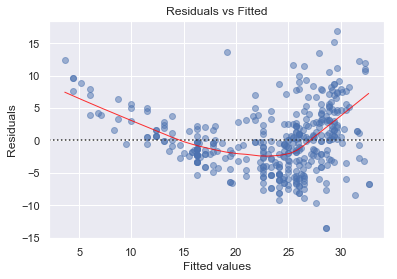

In [ ]:
# fitted values
model_fitted_y = ols.fittedvalues;
# Basic plot
plot = sns.residplot(model_fitted_y, 'mpg', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 
                               'lw': 1, 'alpha': 0.8});

plot.set_title('Residuals vs Fitted');
plot.set_xlabel('Fitted values');
plot.set_ylabel('Residuals');

The residuals are not equally spread around a horizontal line which is an indication for a non-linear relationship. This means there seems to be a non-linear relationship between the predictor and the response variable which the model doesn’t capture.

### Normal Q-Q

This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.

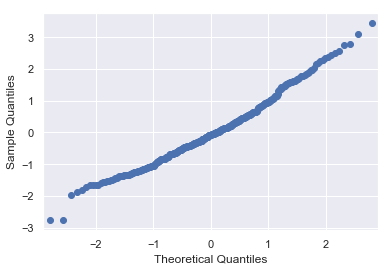

In [ ]:
# Use standardized residuals
sm.qqplot(ols.get_influence().resid_studentized_internal);

This plot shows if residuals are normally distributed. If a normal distribution is present, the residuals should (more or less) follow a straight line. 
We can observe that only some residuals (in the lower left and the upper right corner) deviate from the straight line. 

We could obtain the 3 observations with the largest deviations from our advanced plot below (observations 330, 327 and 320). 

### Scale-Location plot

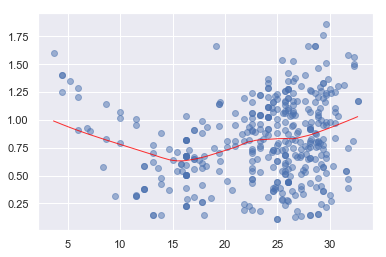

In [ ]:
# Scale Location plot
plt.scatter(ols.fittedvalues, np.sqrt(np.abs(ols.get_influence().resid_studentized_internal)), alpha=0.5)
sns.regplot(ols.fittedvalues, np.sqrt(np.abs(ols.get_influence().resid_studentized_internal)), 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

This plot shows if residuals are spread equally along the ranges of predictors. This is how we can check the assumption of equal variance (homoscedasticity). It’s good if we observe a horizontal line with equally (randomly) spread points.

In our model the residuals begin to spread wider along the y-axis as it passes the x value of around 18. Because the residuals spread wider and wider with an increase of x, the red smooth line is not horizontal and shows a positive angle. This is an indication of heteroskedasticity.

### Residuals vs leverage plot

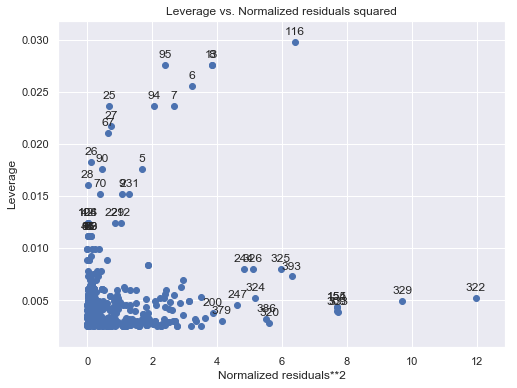

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(ols, ax = ax)

In [ ]:
# Additionally, obtain critical Cook's d values
ols_cooksd = ols.get_influence().cooks_distance[0]
n = len(df["name"])

critical_d = 4/n
print('Critical Cooks d:', critical_d)

#identification of potential outliers
out_d = ols_cooksd > critical_d

# Output potential outliers
df.index[out_d],ols_cooksd[out_d]

Critical Cooks d: 0.01020408163265306


(Int64Index([  5,   6,   7,   8,  13,  59,  94,  95, 116, 154, 155, 244, 247,
             309, 322, 324, 325, 326, 329, 333, 393],
            dtype='int64'),
 array([0.01516703, 0.04326643, 0.03298054, 0.05570847, 0.05570847,
        0.01035856, 0.02525141, 0.03487463, 0.10045073, 0.01687185,
        0.01687185, 0.01962219, 0.01066571, 0.01521074, 0.03151222,
        0.01361433, 0.02425169, 0.02073364, 0.02424383, 0.01494484,
        0.02318925]))

## Alternative models

## GLS regression

In [48]:
gls = smf.gls(formula ='mpg ~  horsepower', data=df).fit()
gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            GLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        21:58:32   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Mixed Linear Model

You find more information about mixed linear models in [Statsmodels documentation](https://www.statsmodels.org/stable/mixed_linear.html)

In [49]:
mlm = smf.mixedlm(formula ='mpg ~  horsepower', data=df, groups=df["cylinders"]).fit()
mlm.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: mpg       
No. Observations: 392     Method:             REML      
No. Groups:       5       Scale:              18.2164   
Min. group size:  3       Log-Likelihood:     -1133.6206
Max. group size:  199     Converged:          Yes       
Mean group size:  78.4                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     33.387    1.919 17.402 0.000 29.627 37.147
horsepower    -0.106    0.011 -9.431 0.000 -0.128 -0.084
Group Var      9.620    1.782                           
========================================================

"""